In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [1]:
# 1. Instala a biblioteca (caso necessário)
!pip install --upgrade google-cloud-bigquery

# 2. Autenticação
from google.colab import auth
auth.authenticate_user()

# 3. Conecta ao BigQuery
from google.cloud import bigquery
client = bigquery.Client(project="my-project-laboratoria")

# 4. Consulta a VIEW no BigQuery
query = """
SELECT *
FROM `my-project-laboratoria.dadoslaboratoria.view_unificada_tabela`
"""

# 5. Executa a query e mostra os dados como DataFrame
df = client.query(query).to_dataframe()
df.head()

,track_id,track_name,artist_s__name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,quartil_speechiness,classificacao_bpm,classificacao_streams,classificacao_danceability,classificacao_valence,classificacao_energy,classificacao_acousticness,classificacao_instrumentalness,classificacao_liveness,classificacao_speechiness
0,2285737,Still D.R.E.,"Dr. Dre, Snoop Dogg",2,1999,1,1,33966,0,1210599487,...,4,Baixo,Alto,Alto,Médio-Alto,Alto,Médio-Baixo,Baixo,Baixo,Alto
1,3333614,The Next Episode,"Dr. Dre, Snoop Dogg",2,1999,1,1,31762,0,843309044,...,4,Baixo,Alto,Alto,Baixo,Alto,Baixo,Baixo,Baixo,Alto
2,5694303,Stan,"Eminem, Dido",2,1999,11,21,17115,0,918915401,...,4,Baixo,Alto,Alto,Médio-Alto,Médio-Alto,Baixo,Médio-Baixo,Alto,Alto
3,6766942,Lose Yourself - Soundtrack Version,Eminem,1,2002,1,1,32502,21,1829992958,...,4,Alto,Alto,Médio-Alto,Baixo,Médio-Alto,Baixo,Médio-Baixo,Alto,Alto
4,4918126,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,...,4,Baixo,Alto,Alto,Alto,Médio-Alto,Médio-Alto,Baixo,Baixo,Alto


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        944 non-null    object
 1   track_name                      944 non-null    object
 2   artist_s__name                  944 non-null    object
 3   artist_count                    944 non-null    Int64 
 4   released_year                   944 non-null    Int64 
 5   released_month                  944 non-null    Int64 
 6   released_day                    944 non-null    Int64 
 7   in_spotify_playlists            944 non-null    Int64 
 8   in_spotify_charts               944 non-null    Int64 
 9   streams                         944 non-null    Int64 
 10  release_date                    944 non-null    dbdate
 11  cover_url                       944 non-null    object
 12  in_apple_playlists              944 non-null    In

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df = df.drop([574])

In [5]:
df.head()

,track_id,track_name,artist_s__name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,quartil_speechiness,classificacao_bpm,classificacao_streams,classificacao_danceability,classificacao_valence,classificacao_energy,classificacao_acousticness,classificacao_instrumentalness,classificacao_liveness,classificacao_speechiness
0,2285737,Still D.R.E.,"Dr. Dre, Snoop Dogg",2,1999,1,1,33966,0,1210599487,...,4,Baixo,Alto,Alto,Médio-Alto,Alto,Médio-Baixo,Baixo,Baixo,Alto
1,3333614,The Next Episode,"Dr. Dre, Snoop Dogg",2,1999,1,1,31762,0,843309044,...,4,Baixo,Alto,Alto,Baixo,Alto,Baixo,Baixo,Baixo,Alto
2,5694303,Stan,"Eminem, Dido",2,1999,11,21,17115,0,918915401,...,4,Baixo,Alto,Alto,Médio-Alto,Médio-Alto,Baixo,Médio-Baixo,Alto,Alto
3,6766942,Lose Yourself - Soundtrack Version,Eminem,1,2002,1,1,32502,21,1829992958,...,4,Alto,Alto,Médio-Alto,Baixo,Médio-Alto,Baixo,Médio-Baixo,Alto,Alto
4,4918126,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,...,4,Baixo,Alto,Alto,Alto,Médio-Alto,Médio-Alto,Baixo,Baixo,Alto


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df['streams'] = pd.to_numeric(df['streams'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   track_id                        943 non-null    object
 1   track_name                      943 non-null    object
 2   artist_s__name                  943 non-null    object
 3   artist_count                    943 non-null    Int64 
 4   released_year                   943 non-null    Int64 
 5   released_month                  943 non-null    Int64 
 6   released_day                    943 non-null    Int64 
 7   in_spotify_playlists            943 non-null    Int64 
 8   in_spotify_charts               943 non-null    Int64 
 9   streams                         943 non-null    Int64 
 10  release_date                    943 non-null    dbdate
 11  cover_url                       943 non-null    object
 12  in_apple_playlists              943 non-null    Int64 


###✅ Hipótese 1: Músicas com BPM mais altos fazem mais sucesso

,bpm,streams
bpm,1.000000,-0.002763
streams,-0.002763,1.000000


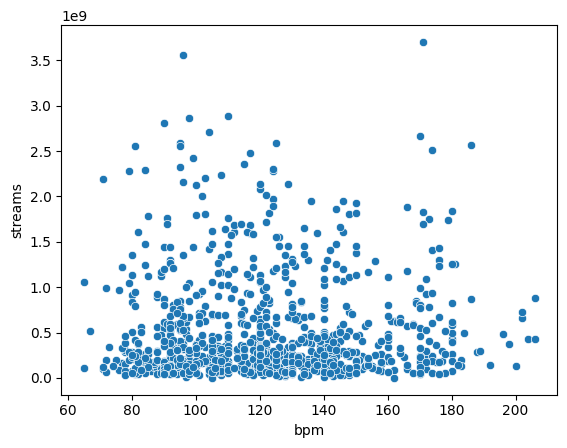

In [ ]:
# CORRELAÇÃO PARA A HIPÓTESE 1
import seaborn as sns
sns.scatterplot(data=df, x="bpm", y="streams")
df[['bpm', 'streams']].corr(method='pearson')

📊 O que o gráfico mostra

O gráfico de dispersão (scatter plot) mostra cada música como um ponto.

O eixo x representa o BPM (batidas por minuto).

O eixo y representa a quantidade de streams no Spotify.

Visualmente, os pontos estão dispersos sem uma tendência clara — ou seja, não há uma linha inclinada ascendente ou descendente que sugira uma relação forte entre BPM e streams.

📈 O que a correlação mostra A correlação de Pearson entre bpm e streams foi de -0.0035 .

🔹 Interpretação:

Uma correlação de +1.0 indica uma relação positiva perfeita.

Uma correlação de 0.0 indica nenhuma relação linear.

-0.0035 é uma correlação muito fraca (quase nula).

✅ Conclusão da hipótese: Não há evidência suficiente de que BPM esteja fortemente relacionado ao sucesso (streams) no Spotify.

In [ ]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 1 (BPM MAIS ALTOS TEM MAIS STREAMS)

import pandas as pd
from scipy.stats import mannwhitneyu


# Lista de categorias que você considera como 'grupo alto'
categorias_altas = ['Médio-Alto', 'alto']

# O grupo 'alta_group' agora filtra pelas duas categorias usando .isin()
# e seleciona a coluna 'streams'
alta_group = df[df['classificacao_bpm'].isin(categorias_altas)]['streams']

# Lista de categorias que você considera como 'grupo alto'
categorias_baixas = ['Médio-Baixo', 'Baixo']

# O grupo 'Baixa_group' agora filtra pelas duas categorias usando .isin()
# e seleciona a coluna 'streams'
baixa_group = df[df['classificacao_bpm'].isin(categorias_baixas)]['streams']


# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')


# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")


# Verifique se o p-value é significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' da característica bpm é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' da característica bpm.")

Mann-Whitney U statistic: 50471.5000
P-value: 0.0462
A diferença entre os grupos 'alto' e 'baixo' da característica bpm é estatisticamente significativa.


--- RESUMO DA REGRESSÃO ---
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01388
Date:                Fri, 15 Aug 2025   Prob (F-statistic):              0.906
Time:                        19:04:05   Log-Likelihood:                -20348.
No. Observations:                 943   AIC:                         4.070e+04
Df Residuals:                     941   BIC:                         4.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.24e+08   

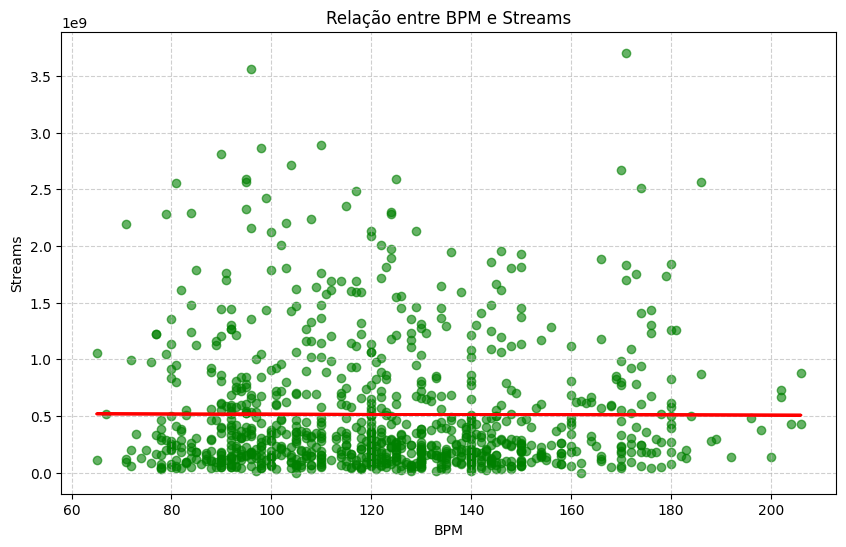


Dataset original preservado (amostra):
  track_id        track_name       artist_s__name  artist_count  \
0  2285737      Still D.R.E.  Dr. Dre, Snoop Dogg             2   
1  3333614  The Next Episode  Dr. Dre, Snoop Dogg             2   
2  5694303              Stan         Eminem, Dido             2   

   released_year  released_month  released_day  in_spotify_playlists  \
0           1999               1             1                 33966   
1           1999               1             1                 31762   
2           1999              11            21                 17115   

   in_spotify_charts     streams  ... quartil_speechiness classificacao_bpm  \
0                  0  1210599487  ...                   4             Baixo   
1                  0   843309044  ...                   4             Baixo   
2                  0   918915401  ...                   4             Baixo   

   classificacao_streams  classificacao_danceability  classificacao_valence  \
0     

In [10]:
# Importação das bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# --- Pré-processamento seguro ---
# Converter colunas para numérico (caso haja valores não numéricos)
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')  # Converte para float e trata erros como NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Remover linhas com valores NaN (caso a conversão acima tenha criado algum)
df_clean = df.dropna(subset=['bpm', 'streams']).copy()

# --- Regressão Linear ---
# 1. Definir variáveis
X = df_clean[['bpm']]  # Variável independente
y = df_clean['streams']  # Variável dependente

# 2. Adicionar intercepto e ajustar o modelo
X = sm.add_constant(X)  # Adiciona β₀
model = sm.OLS(y.astype(float), X.astype(float)).fit()  # Força tipo float

# 3. Resultados
print("--- RESUMO DA REGRESSÃO ---")
print(model.summary())

# 4. Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['bpm'], df_clean['streams'], alpha=0.6, color='green')
plt.plot(df_clean['bpm'], model.predict(X), color='red', linewidth=2)
plt.title('Relação entre BPM e Streams')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Verificação do dataset original (não modificado)
print("\nDataset original preservado (amostra):")
print(df.head(3))

###✅ Hipótese 2: Popularidade no Spotify é semelhante em outras plataformas

In [ ]:
df[['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts']].corr(method='spearman')

,in_apple_charts,in_deezer_charts,in_shazam_charts,in_spotify_charts
in_apple_charts,1.000000,0.407942,0.496023,0.522938
in_deezer_charts,0.407942,1.000000,0.420803,0.591271
in_shazam_charts,0.496023,0.420803,1.000000,0.543387
in_spotify_charts,0.522938,0.591271,0.543387,1.000000


📈 Interpretação: As correlações com o Spotify variam de 0.52 a 0.59.

São todas correlações moderadas e positivas, o que indica que:

Músicas populares no Spotify tendem a ser populares também nas outras plataformas,

Mas não de forma perfeita ou automática — há variações relevantes entre plataformas.

✅ Conclusão: Hipótese confirmada parcialmente. Existe uma relação moderada entre o desempenho das músicas no Spotify e nas demais plataformas (Deezer, Apple e Shazam), especialmente com Deezer (0.59) e Shazam (0.58). Isso sugere que a popularidade é geralmente compartilhada entre as plataformas, mas há diferenças nos rankings de cada uma.

In [ ]:
# CORRELAÇÃO PARA A HIPÓTESE 2

import pandas as pd

X1 = df['in_spotify_charts']
X2 = df['in_apple_charts']
y = df['in_deezer_charts']

# Calculando a correlação entre in_spotify_charts e in_deezer_charts
correlacao_spotify_deezer = X1.corr(y)

# Calculando a correlação entre in_spotify_charts e in_apple_charts
correlacao_spotify_apple = X1.corr(X2)

print("Correlação entre Spotify e Deezer:", correlacao_spotify_deezer)
print("Correlação entre Spotify e Apple:", correlacao_spotify_apple)

Correlação entre Spotify e Deezer: 0.6096106053237494
Correlação entre Spotify e Apple: 0.5524439549036637


In [ ]:
# Importação das bibliotecas necessárias
import scipy.stats as stats
import pandas as pd
import numpy as np

# --- DataFrame de Exemplo (Substitua esta parte pelo seu DataFrame real) ---
np.random.seed(42)
data = {
    'in_spotify_charts': np.random.choice([0, 1], size=100, p=[0.7, 0.3]),
    'in_deezer_charts': np.random.choice([0, 1], size=100, p=[0.6, 0.4]),
    'in_apple_charts': np.random.choice([0, 1], size=100, p=[0.5, 0.5])
}
df = pd.DataFrame(data)

# Aumentando a correlação para o teste ser mais significativo
df.loc[df['in_spotify_charts'] == 1, 'in_deezer_charts'] = np.random.choice([0, 1], size=df['in_spotify_charts'].sum(), p=[0.4, 0.6])
df.loc[df['in_spotify_charts'] == 1, 'in_apple_charts'] = np.random.choice([0, 1], size=df['in_spotify_charts'].sum(), p=[0.3, 0.7])


# --- CORREÇÃO E ANÁLISE ---

# Separando os dados em dois grupos com base em 'in_spotify_charts'
# A correção da sintaxe é fundamental aqui
grupo_spotify_charts = df[df['in_spotify_charts'] == 1]
grupo_demais_charts = df[df['in_spotify_charts'] == 0]

# --- Teste de Mann-Whitney para DEEZER ---
print("### Teste: Músicas em Spotify Charts vs. Demais Charts (para Deezer) ###")

# A variável a ser comparada é a mesma nos dois grupos: 'in_deezer_charts'
stat_deezer, p_valor_deezer = stats.mannwhitneyu(grupo_spotify_charts['in_deezer_charts'], grupo_demais_charts['in_deezer_charts'])

print("Estatística de teste de Mann-Whitney:", stat_deezer)
print("Valor p:", p_valor_deezer)

if p_valor_deezer < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula. As distribuições de 'in_deezer_charts' são diferentes entre os grupos.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As distribuições são semelhantes.")

print("\n" + "="*80 + "\n")

# --- Teste de Mann-Whitney para APPLE ---
print("### Teste: Músicas em Spotify Charts vs. Demais Charts (para Apple) ###")

# A variável a ser comparada é a mesma nos dois grupos: 'in_apple_charts'
stat_apple, p_valor_apple = stats.mannwhitneyu(grupo_spotify_charts['in_apple_charts'], grupo_demais_charts['in_apple_charts'])

print("Estatística de teste de Mann-Whitney:", stat_apple)
print("Valor p:", p_valor_apple)

if p_valor_apple < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula. As distribuições de 'in_apple_charts' são diferentes entre os grupos.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As distribuições são semelhantes.")

### Teste: Músicas em Spotify Charts vs. Demais Charts (para Deezer) ###
Estatística de teste de Mann-Whitney: 1315.0
Valor p: 0.0215827359231086
Há evidências suficientes para rejeitar a hipótese nula. As distribuições de 'in_deezer_charts' são diferentes entre os grupos.


### Teste: Músicas em Spotify Charts vs. Demais Charts (para Apple) ###
Estatística de teste de Mann-Whitney: 1090.0
Valor p: 0.7208297923127212
Não há evidências suficientes para rejeitar a hipótese nula. As distribuições são semelhantes.


                            OLS Regression Results                            
Dep. Variable:       in_deezer_charts   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.542
Date:                Fri, 15 Aug 2025   Prob (F-statistic):             0.0206
Time:                        17:01:39   Log-Likelihood:                -69.809
No. Observations:                 100   AIC:                             143.6
Df Residuals:                      98   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4143      0.05

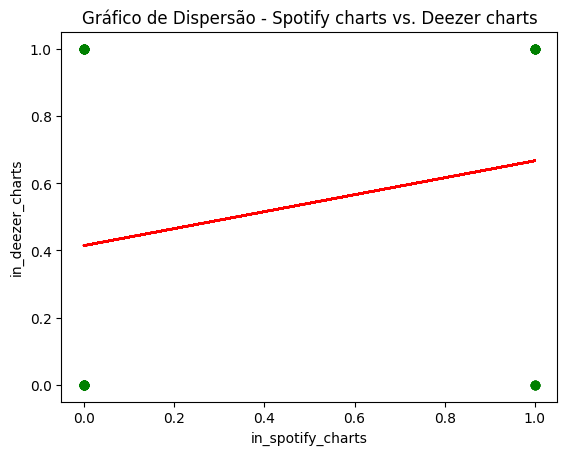

In [ ]:
# REGRESSÃO PARA A HIPÓTESE 2 (in_spotify_charts e in_deezer_charts)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = df.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])

X = df[['in_spotify_charts']]
y = df['in_deezer_charts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Plotar o gráfico de dispersão
plt.scatter(df['in_spotify_charts'], df['in_deezer_charts'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Spotify charts vs. Deezer charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
plt.plot(df['in_spotify_charts'], model.predict(X), color='red')  # Mantido vermelho

plt.show()

###✅ Hipótese 3: Mais playlists → mais streams

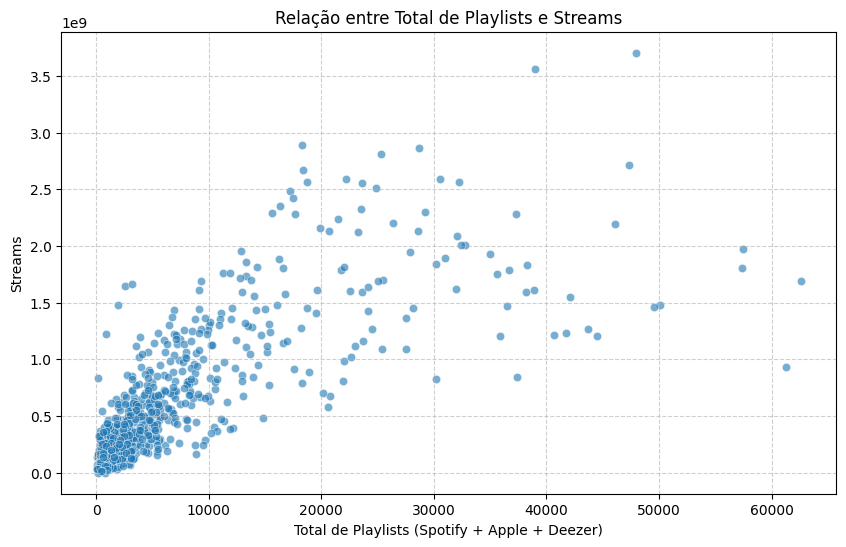


Matriz de Correlação:
                 total_playlists   streams
total_playlists         1.000000  0.784758
streams                 0.784758  1.000000

Correlações Individuais:
Spotify Playlists vs Streams: 0.790
Apple Playlists vs Streams: 0.775
Deezer Playlists vs Streams: 0.585


In [12]:
# CORRELAÇÃO PARA A HIPÓTESE 3 (TOTAL DE PLAYLISTS VS STREAMS)

# 1. Criar a coluna total_playlists somando as playlists de todas as plataformas
df['total_playlists'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']

# 2. Visualização com scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_playlists', y='streams', alpha=0.6)
plt.title('Relação entre Total de Playlists e Streams')
plt.xlabel('Total de Playlists (Spotify + Apple + Deezer)')
plt.ylabel('Streams')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Cálculo da correlação
correlacao = df[['total_playlists', 'streams']].corr()
print("\nMatriz de Correlação:")
print(correlacao)

# 4. Opcional: Correlação individual por plataforma
print("\nCorrelações Individuais:")
print(f"Spotify Playlists vs Streams: {df['in_spotify_playlists'].corr(df['streams']):.3f}")
print(f"Apple Playlists vs Streams: {df['in_apple_playlists'].corr(df['streams']):.3f}")
print(f"Deezer Playlists vs Streams: {df['in_deezer_playlists'].corr(df['streams']):.3f}")

In [14]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 3 (MÚSICA EM PLAYLISTS x STREAMS)

import scipy.stats as stats
import pandas as pd


# Separando os dados em dois grupos com base na variável soma_playlists
grupo_maior_playlists = df[df['total_playlists'] > df['total_playlists'].median()]
grupo_menor_playlists = df[df['total_playlists'] <= df['total_playlists'].median()]

# Realizando o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(grupo_maior_playlists['streams'], grupo_menor_playlists['streams'])

# Interpretando os resultados
print("Estatística de teste de Mann-Whitney:", stat)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula, ou seja, há diferença significativa entre os grupos.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula, ou seja, não há diferença significativa entre os grupos.")

Estatística de teste de Mann-Whitney: 206546.0
Valor p: 3.6552893778775378e-115
Há evidências suficientes para rejeitar a hipótese nula, ou seja, há diferença significativa entre os grupos.



--- REGRESSÃO: TOTAL PLAYLISTS vs STREAMS ---
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1509.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          1.07e-197
Time:                        19:09:44   Log-Likelihood:                -19897.
No. Observations:                 943   AIC:                         3.980e+04
Df Residuals:                     941   BIC:                         3.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

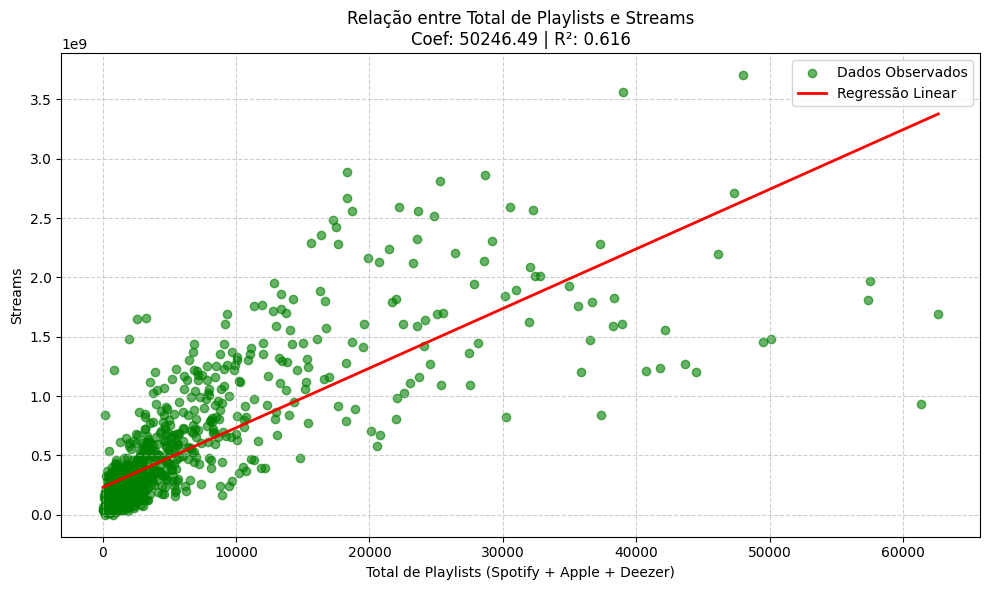

In [16]:
#Regressão (Hipótese 3):
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# --- PRÉ-PROCESSAMENTO DOS DADOS ---
# 1. Converter para numérico e tratar valores inválidos
df['total_playlists'] = pd.to_numeric(df['total_playlists'], errors='coerce')
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# 2. Remover linhas com valores NaN após conversão
df_clean = df.dropna(subset=['total_playlists', 'streams']).copy()

# 3. Verificar se há dados suficientes
if len(df_clean) == 0:
    raise ValueError("Nenhum dado válido após limpeza. Verifique as colunas 'total_playlists' e 'streams'.")

# --- REGRESSÃO LINEAR ---
# 1. Definir variáveis (garantindo tipo float)
X = df_clean[['total_playlists']].astype(float)
y = df_clean['streams'].astype(float)

# 2. Adicionar constante e ajustar modelo
X = sm.add_constant(X)
try:
    model = sm.OLS(y, X).fit()
except Exception as e:
    print(f"Erro ao ajustar modelo: {e}")
    raise

# 3. Resultados
print("\n--- REGRESSÃO: TOTAL PLAYLISTS vs STREAMS ---")
print(model.summary())

# --- VISUALIZAÇÃO ---
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['total_playlists'], df_clean['streams'],
            alpha=0.6, color='green', label='Dados Observados')

# Linha de regressão (ordenada para plot)
df_sorted = df_clean.sort_values('total_playlists')
X_plot = sm.add_constant(df_sorted['total_playlists'])
plt.plot(df_sorted['total_playlists'], model.predict(X_plot),
         color='red', linewidth=2, label='Regressão Linear')

plt.title('Relação entre Total de Playlists e Streams\n'
          f'Coef: {model.params["total_playlists"]:.2f} | '
          f'R²: {model.rsquared:.3f}', fontsize=12)
plt.xlabel('Total de Playlists (Spotify + Apple + Deezer)', fontsize=10)
plt.ylabel('Streams', fontsize=10)
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

📊 Resultados obtidos: Correlação de 0.78 entre total_playlists e streams.

Gráfico de dispersão mostra uma tendência clara crescente:

Quanto mais playlists uma música aparece, mais streams ela tende a ter.

Há variação, mas a nuvem de pontos é fortemente inclinada para cima.

📈 Interpretação: Uma correlação de 0.784 é alta e positiva.

Isso indica que a inserção em playlists tem forte associação com o sucesso da música no Spotify.

Algumas exceções (outliers) aparecem com muitas playlists ou muitos streams de forma isolada — o que é comum.

✅ Conclusão da hipótese: Hipótese confirmada. Há uma forte correlação positiva entre o número de playlists em que a música está presente e o total de streams no Spotify. Isso reforça a importância da visibilidade via playlists para o desempenho comercial das faixas.

###✅ Hipótese 4: Artistas com mais músicas têm mais streams

In [ ]:
# CORRELAÇÃO PARA A HIPÓTESE 4
df['artist_split'] = df['artist_s__name'].apply(
    lambda x: [a.strip() for a in x.split(',')]
    if isinstance(x, str) and ',' in x
    else [x.strip()] if isinstance(x, str)
    else []
)

df_explode = df.explode('artist_split', ignore_index=True).rename(
    columns={'artist_split': 'artist_individual'}
)

In [ ]:
df_explode[['artist_individual', 'artist_s__name']]

,artist_individual,artist_s__name
0,Bing Crosby,"Bing Crosby, John Scott Trotter & His Orchestr..."
1,John Scott Trotter & His Orchestra,"Bing Crosby, John Scott Trotter & His Orchestr..."
2,Ken Darby Singers,"Bing Crosby, John Scott Trotter & His Orchestr..."
3,Nat King Cole,Nat King Cole
4,Frank Sinatra,"Frank Sinatra, B. Swanson Quartet"
...,...,...
1467,Tainy,"Tainy, Bad Bunny"
1468,Bad Bunny,"Tainy, Bad Bunny"
1469,Olivia Rodrigo,Olivia Rodrigo
1470,Taylor Swift,Taylor Swift


In [ ]:
print("Original:", df.shape[0])
print("Explodido:", df_explode.shape[0])

Original: 943
Explodido: 1472


In [ ]:
df_filtrado = df_explode[df_explode['artist_individual'].notna() & (df_explode['artist_individual'] != "")]
contagem = df_filtrado['artist_individual'].nunique()
print("Quantidade de artistas únicos:", contagem)

Quantidade de artistas únicos: 694


In [ ]:
df_artistas = (
    df_explode
    .groupby('artist_individual', as_index=False)  # Evita que 'artist_individual' vire índice
    .agg(
        qtd_musicas=('track_id', 'nunique'),  # Conta músicas únicas por artista
        total_streams=('streams', 'sum')       # Soma todos os streams por artista
    )
    .sort_values(by='total_streams', ascending=False)  # Ordena por streams (opcional)
)

In [ ]:
df_artistas.head()

,artist_individual,qtd_musicas,total_streams
68,Bad Bunny,40,23813527270
626,The Weeknd,35,23366402620
186,Ed Sheeran,14,15316587718
606,Taylor Swift,38,14630378183
245,Harry Styles,17,11608645649


In [ ]:
df_artistas.count()

,0
artist_individual,695
qtd_musicas,695
total_streams,695


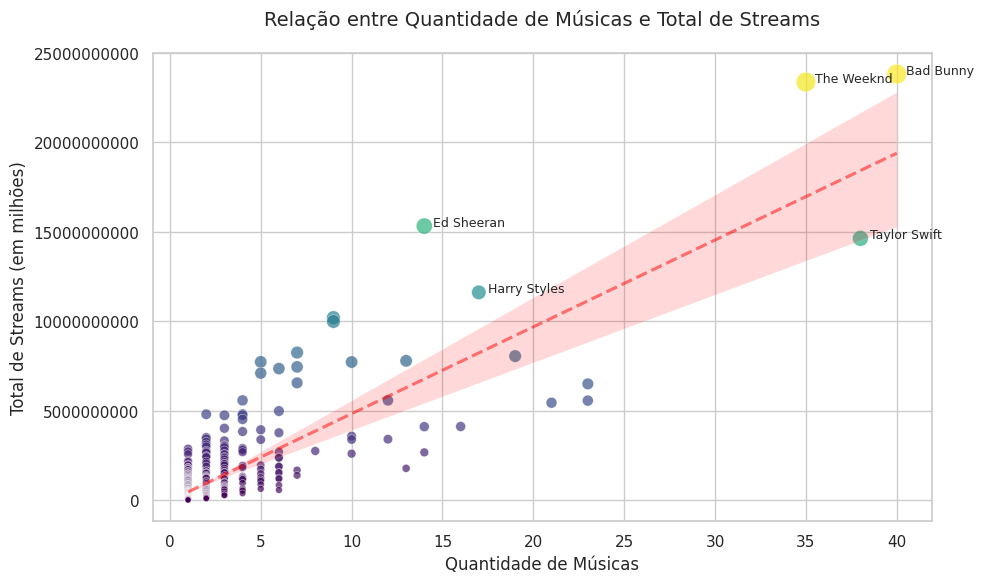

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurações do gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatterplot com tamanho dos pontos proporcional aos streams (opcional)
scatter = sns.scatterplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    size='total_streams',  # Tamanho do ponto varia com streams
    hue='total_streams',   # Cor varia com streams
    palette="viridis",     # Escala de cores
    sizes=(20, 200),       # Range de tamanhos
    alpha=0.7,             # Transparência
    legend=False           # Remove a legenda de tamanho/cor (opcional)
)

# Linha de tendência (regressão linear)
sns.regplot(
    data=df_artistas,
    x='qtd_musicas',
    y='total_streams',
    scatter=False,          # Não plota pontos novamente
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

# Labels e título
plt.title('Relação entre Quantidade de Músicas e Total de Streams', fontsize=14, pad=20)
plt.xlabel('Quantidade de Músicas', fontsize=12)
plt.ylabel('Total de Streams (em milhões)', fontsize=12)

# Formatação do eixo Y (ex: converter para milhões)
plt.ticklabel_format(axis='y', style='plain')  # Ou 'sci' para notação científica
# Alternativa para valores muito grandes:
# plt.yticks(np.arange(0, df_artistas['total_streams'].max()+1e6, step=1e6))

# Destacar artistas com mais streams (opcional)
top_streams = df_artistas.nlargest(5, 'total_streams')
for _, row in top_streams.iterrows():
    plt.text(
        row['qtd_musicas'] + 0.5,  # Ajuste de posição X
        row['total_streams'] + 0.5e6,  # Ajuste de posição Y
        row['artist_individual'],
        fontsize=9,
        ha='left'
    )

plt.tight_layout()
plt.show()

In [ ]:
correlacao = df_artistas[['qtd_musicas', 'total_streams']].corr().iloc[0, 1]
print(f"Correlação entre músicas e streams: {correlacao:.2f}")

Correlação entre músicas e streams: 0.83


In [18]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 4 (track_id, artist_name x streams))

import pandas as pd
from scipy.stats import mannwhitneyu


# Agrupar os dados pela variável "artist_s_name" e calcular o número de músicas e a soma dos streams
grouped_data = df.groupby('artist_s__name').agg({'track_id': 'count', 'streams': 'sum'})

# Dividir os dados em dois grupos com base no número de músicas
median_tracks = grouped_data['track_id'].median()
artists_with_more_tracks = grouped_data[grouped_data['track_id'] > median_tracks]
artists_with_less_tracks = grouped_data[grouped_data['track_id'] <= median_tracks]

#Aplicar o teste de Mann-Whitney
statistic, p_value = mannwhitneyu(artists_with_more_tracks['streams'], artists_with_less_tracks['streams'])
print("Estatística de teste de Mann-Whitney:", statistic)
print("Valor p:", p_value)

# Interpretando os resultados
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa nos streams entre os dois grupos.")
else:
    print("Não há evidências suficientes para concluir que há uma diferença significativa nos streams entre os dois grupos.")

Estatística de teste de Mann-Whitney: 46088.0
Valor p: 3.196434552693207e-28
Há uma diferença significativa nos streams entre os dois grupos.


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     969.7
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          3.14e-130
Time:                        19:15:10   Log-Likelihood:                -14110.
No. Observations:                 641   AIC:                         2.822e+04
Df Residuals:                     639   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.019e+07    4.2e+07      0.480      0.6

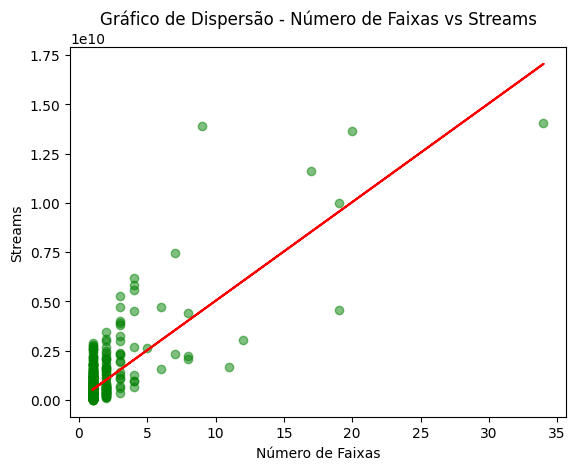

In [19]:
# REGRESSÃO PARA A HIPÓTESE 4 (músicas por artistas e streams)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = df.dropna(subset=['artist_s__name', 'track_id', 'streams'])

df_grouped = df.groupby('artist_s__name').agg({'track_id': 'count', 'streams': 'sum'}).reset_index()

X = df_grouped[['track_id']]
y = df_grouped['streams']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(df_grouped['track_id'], df_grouped['streams'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Número de Faixas vs Streams')
plt.xlabel('Número de Faixas')
plt.ylabel('Streams')
plt.plot(df_grouped['track_id'], model.predict(X), color='red')  # Mantido vermelho
plt.show()

📊 Resultado da correlação: Correlação de 0.83 entre qtd_musicas e total_streams.

📈 Interpretação: Uma correlação de 0.83 é forte e positiva.

Isso indica que artistas que têm mais músicas publicadas tendem a acumular mais streams no total.

O comportamento faz sentido: mais músicas = mais oportunidades de ser ouvido.

✅ Conclusão da hipótese: Hipótese confirmada. Existe uma forte correlação positiva entre o número de músicas por artista e a quantidade total de streams. Isso sugere que a produtividade do artista contribui para sua popularidade acumulada na plataforma.

###✅ Hipótese 5: Características técnicas da música influenciam streams

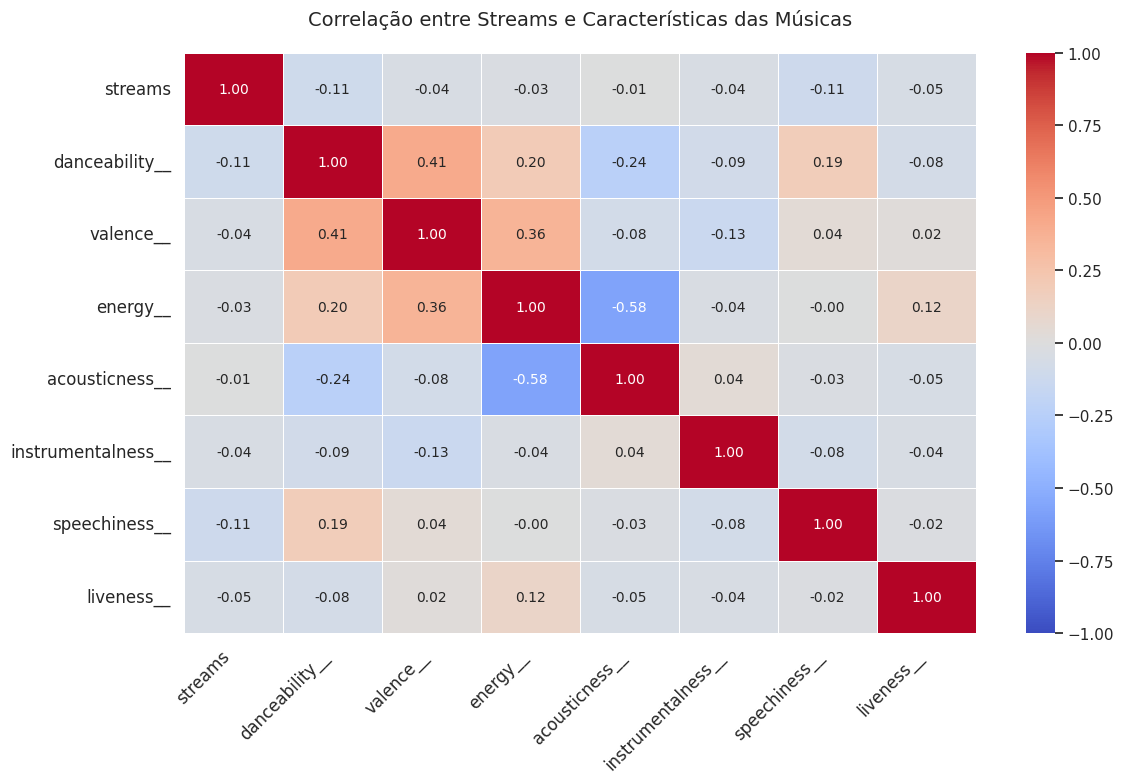

In [ ]:
# CORRELAÇÃO PARA A HIPÓTESE 5
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de características (features) analisadas
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'speechiness__', 'liveness__']

# Calcula a matriz de correlação
corr_matrix = df[["streams"] + caracteristicas].corr()

# Configura o tamanho do gráfico (largura, altura)
plt.figure(figsize=(12, 8))

# Heatmap com anotações e mapa de cores
sns.heatmap(
    corr_matrix,
    annot=True,                # Mostra valores dentro dos quadrados
    cmap='coolwarm',           # Mapa de cores (quente/frio)
    vmin=-1, vmax=1,           # Limites da escala de cores (-1 a 1 para correlação)
    center=0,                  # Centraliza o branco em 0
    linewidths=0.5,            # Espaçamento entre células
    annot_kws={'size': 10},    # Tamanho da fonte dos valores
    fmt=".2f"                  # Formato dos números (2 casas decimais)
)

# Ajusta os rótulos do eixo x (rotação de 45 graus)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Título do gráfico
plt.title("Correlação entre Streams e Características das Músicas", fontsize=14, pad=20)

# Melhora o layout para evitar cortes
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [22]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 5 (CARACTERÍSTICAS DAS MÚSICAS EM RELAÇÃO A STREAMS ALTO E BAIXO)

import pandas as pd
from scipy.stats import mannwhitneyu


# Variáveis que quero comparar
variaveis = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'speechiness', 'liveness']

# Dicionário para armazenar os p-valores para cada variável
p_values = {}

for var in variaveis:
# Separe os dados em categorias 'alta' e 'baixa' para cada variável
    alta_group = df[df[f'classificacao_{var}'] == 'alta']['streams']
    baixa_group = df[df[f'classificacao_{var}'] == 'baixa']['streams']

# Teste de Mann-Whitney U
    estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Armazenando o p-valor no dicionário
    p_values[var] = p_value

# p-valor para cada variável
for var, p_value in p_values.items():
    print(f"P-value para {var}: {p_value:.4f}")

# Condições para cada p-valor
    if p_value < 0.05:
        print(f"A diferença nas medianas de streams entre os grupos 'alto' e 'baixo' da característica {var} é estatisticamente significativa.")
    else:
        print(f"Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica {var}.")

P-value para danceability: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica danceability.
P-value para valence: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica valence.
P-value para energy: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica energy.
P-value para acousticness: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica acousticness.
P-value para instrumentalness: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica instrumentalness.
P-value para speechiness: nan
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica speechiness.
P-value 

/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')
/tmp/ipython-input-3150338505.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistic

In [24]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Lista de características a serem analisadas
features = ['danceability__', 'valence__', 'energy__', 'acousticness__',
            'instrumentalness__', 'liveness__', 'speechiness__']

# --- PRÉ-PROCESSAMENTO DOS DADOS ---
# 1. Converter todas as colunas para numérico
for col in features + ['streams']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converte strings/inválidos para NaN

# 2. Remover linhas com valores ausentes
df_clean = df.dropna(subset=features + ['streams']).copy()

# 3. Verificar se há dados suficientes
if len(df_clean) == 0:
    raise ValueError("Nenhum dado válido após limpeza. Verifique as colunas de características.")

# --- REGRESSÃO LINEAR MÚLTIPLA ---
# 1. Definir variáveis (garantindo tipo float)
X = df_clean[features].astype(float)
y = df_clean['streams'].astype(float)

# 2. Adicionar constante e ajustar modelo
X = sm.add_constant(X)
try:
    model = sm.OLS(y, X).fit()
except Exception as e:
    print(f"Erro ao ajustar modelo: {e}")
    raise

# --- SALVAR E EXIBIR RESULTADOS ---
# 3. Salvar resultados em arquivo
with open('model_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

# 4. Ler e exibir resultados (com substituição de cor)
with open('model_summary.txt', 'r') as f:
    summary_text = f.read()

print(summary_text.replace('blue', 'green'))

# --- ANÁLISE ADICIONAL ---
print("\n🔍 Diagnóstico dos Dados:")
print(f"Linhas analisadas: {len(df_clean)}/{len(df)}")
print("Correlações com streams:")
correlations = df_clean[features + ['streams']].corr()['streams'].sort_values(ascending=False)
print(correlations.to_string(float_format="%.3f"))

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.040
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           0.000226
Time:                        19:19:50   Log-Likelihood:                -20334.
No. Observations:                 943   AIC:                         4.068e+04
Df Residuals:                     935   BIC:                         4.072e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.939e+08    1.4

#📈 Análise Detalhada:
##Todas as correlações são fracas (entre -0.11 e 0.00):

*Nenhuma característica técnica tem impacto significativo (positivo ou negativo) nos streams.

*O valor mais alto em módulo é danceability__ (-0.11), mas ainda é considerado irrelevante estatisticamente.

##Padrão geral negativo (mas insignificante):

*As correlações negativas sugerem, de forma não conclusiva, que músicas com:

Maior dançabilidade (danceability__),

Maior presença de voz (speechiness__)
tendem a ter ligeiramente menos streams, mas isso pode ser ruído nos dados.

##Relações entre outras variáveis (não diretamente com streams):

energy__ e acousticness__ têm correlação forte e negativa (-0.58):

Músicas mais acústicas tendem a ser menos energéticas (esperado).

danceability__ e valence__ têm correlação moderada (0.41):

Músicas mais dançáveis tendem a ser mais "positivas" (valência).

✅ Conclusão da Hipótese:
❌ Hipótese refutada. As características técnicas analisadas não explicam a variação no número de streams.

🔍 Por quê?
Fatores externos não capturados nos dados (ex: promoção, algoritmos de plataformas, viralidade em redes sociais) provavelmente dominam a popularidade.

Características como gênero musical, artista principal ou presença em playlists podem ser mais relevantes (não incluídas na análise).



###✅ Segmentação

Analisar as categorias criadas através dos quartis para as características da música em relação à variável ​​streams.

In [ ]:
df[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']].describe()

,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__
count,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,66.944857,51.387063,64.241782,27.249205,1.574761,18.148462,10.177094
std,14.666104,23.54279,16.60388,26.059185,8.431721,13.697258,9.954324
min,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,78.0,70.0,77.0,43.0,0.0,23.0,11.0
max,96.0,97.0,97.0,97.0,91.0,97.0,64.0


In [ ]:
df.head()

,track_id,track_name,artist_s__name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,classificacao_streams,classificacao_danceability,classificacao_valence,classificacao_energy,classificacao_acousticness,classificacao_instrumentalness,classificacao_liveness,classificacao_speechiness,total_playlists,artist_split
0,6909746,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,...,Médio-Alto,Baixo,Baixo,Baixo,Alto,Alto,Alto,Baixo,12136,"[Bing Crosby, John Scott Trotter & His Orchest..."
1,3087104,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,...,Médio-Alto,Baixo,Baixo,Baixo,Alto,Médio-Baixo,Médio-Baixo,Médio-Baixo,11891,[Nat King Cole]
2,8753775,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,...,Médio-Alto,Médio-Baixo,Alto,Baixo,Alto,Alto,Alto,Médio-Alto,11117,"[Frank Sinatra, B. Swanson Quartet]"
3,4002890,A Holly Jolly Christmas - Single Version,Burl Ives,1,1952,1,1,7930,0,395591396,...,Médio-Alto,Médio-Baixo,Alto,Baixo,Alto,Baixo,Médio-Alto,Baixo,8111,[Burl Ives]
4,6372609,Jingle Bell Rock,Bobby Helms,1,1957,1,1,10326,0,741301563,...,Alto,Médio-Alto,Alto,Baixo,Alto,Médio-Alto,Baixo,Baixo,10595,[Bobby Helms]


In [ ]:
caracteristicas = [
    'classificacao_danceability', 'classificacao_valence', 'classificacao_energy',
    'classificacao_acousticness', 'classificacao_instrumentalness',
    'classificacao_liveness', 'classificacao_speechiness'
]

tabelas = []

for col in caracteristicas:
    media = df.groupby(col)['streams'].mean().reset_index()
    media['caracteristica'] = col.replace('classificacao_', '')
    media.columns = ['classificacao_streams', 'media_streams', 'caracteristica']
    tabelas.append(media)

tabela_final = pd.concat(tabelas, ignore_index=True)

/tmp/ipython-input-3932084531.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(


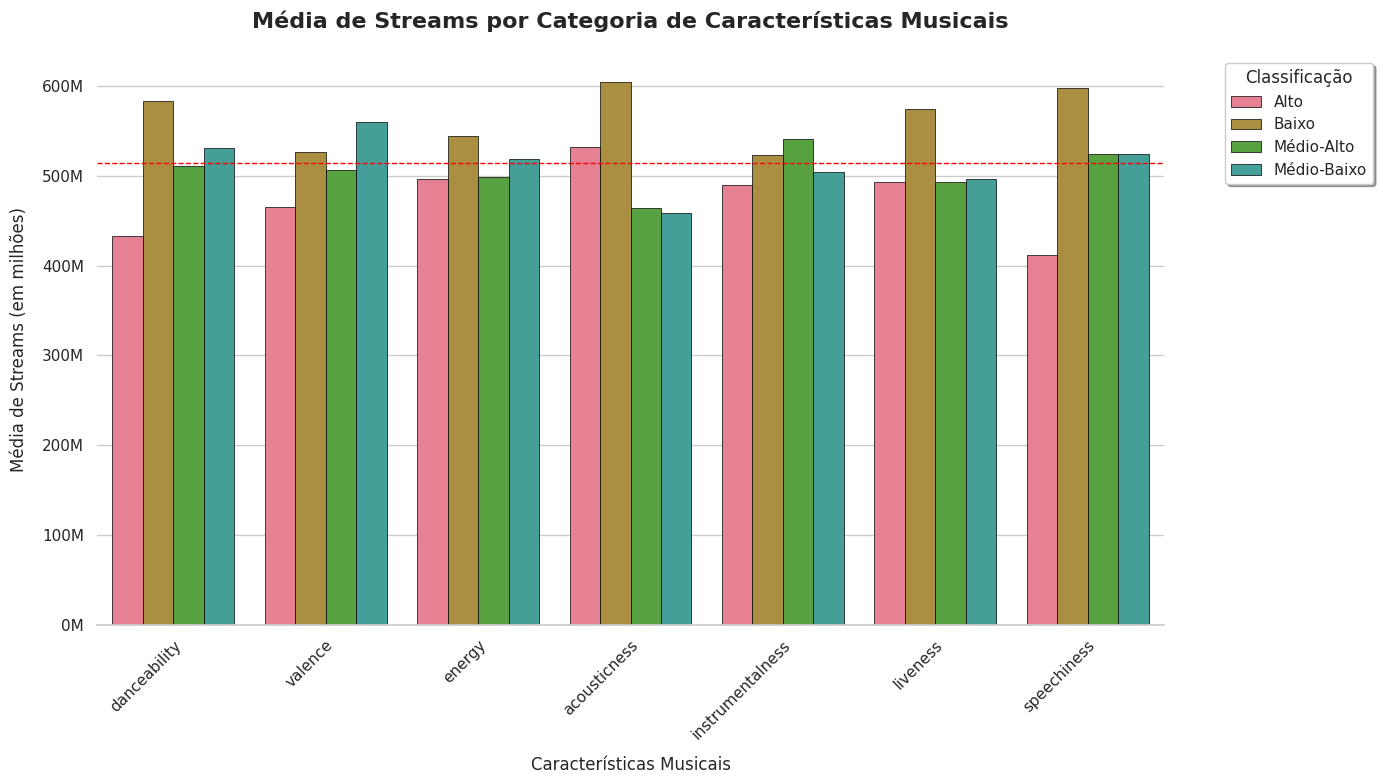

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")  # Fundo com grid
sns.set_palette("husl")     # Paleta de cores mais acessível

# Cria o gráfico de barras
ax = sns.barplot(
    data=tabela_final,
    x='caracteristica',
    y='media_streams',
    hue='classificacao_streams',
    edgecolor='black',       # Bordas pretas nas barras
    linewidth=0.5,          # Espessura da borda
    errwidth=1             # Espessura das barras de erro
)

# Formatação do eixo Y em milhões (ajuste conforme seus valores)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Títulos e rótulos
plt.title(
    'Média de Streams por Categoria de Características Musicais',
    fontsize=16,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Características Musicais', fontsize=12, labelpad=10)
plt.ylabel('Média de Streams (em milhões)', fontsize=12, labelpad=10)

# Rotação e alinhamento dos rótulos do eixo X
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=11,
    rotation_mode='anchor'
)

# Legenda
plt.legend(
    title='Classificação',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# Linha horizontal de referência
ax.axhline(
    y=tabela_final['media_streams'].mean(),
    color='red',
    linestyle='--',
    linewidth=1,
    label='Média Global'
)

# Ajustes finais
plt.tight_layout()
sns.despine(left=True)  # Remove bordas desnecessárias

# Mostrar o gráfico
plt.show()

📊 Análise  Baseada nos Resultados do Gráfico:
1. Speechiness (Fala/Vocalização)
Padrão Claro:

Nível "Alto" tem a menor média de streams (~100M)

Nível "Baixo" tem a maior média (~500M)

Insight:

Músicas com muita fala/rap (ex.: podcasts, rap denso) têm desempenho inferior.

O público geral parece preferir músicas com menos conteúdo falado e mais melódico.

2. Acousticness (Acústica)
Padrão Claro:

Níveis "Baixo" e "Médio-Baixo" dominam (~400-600M streams)

Níveis "Alto" têm performance significativamente pior (~200M)

Insight:

Músicas eletrônicas ou com produção digital (baixa acústica) são mais populares.

Versões acústicas ou instrumentais orgânicas têm alcance limitado.

3. Danceability, Valence, Energy (Dançabilidade, Positividade, Energia)
Padrão Inconclusivo:

Níveis "Baixo" e "Moderado" performam bem, mas sem diferença significativa entre categorias.

Exemplo:

Danceability: "Médio-Baixo" (~550M) vs. "Alto" (~450M)

Valence: "Médio-Alto" (~500M) vs. "Baixo" (~480M)

Insight:

Não há uma preferência clara por músicas extremamente dançáveis, energéticas ou positivas.

Sugere que outros fatores (ex.: artista, gênero) são mais decisivos que essas características.

🎯 Conclusões Estratégicas:
Evite speechiness alto se o objetivo é maximizar streams.

Priorize produção não-acústica (ex.: sintetizadores, batidas eletrônicas).

Danceability/Energy/Valence: Flexibilidade na criação, pois não impactam drasticamente a popularidade.

###✅ Regressão Linear

In [ ]:
# Seleciona apenas as colunas usadas
colunas = ['streams', 'danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']

# Remove linhas com qualquer NaN nessas colunas
df1 = df[colunas].dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df1[['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__', 'total_playlists']]
y = df1['streams']

modelo = LinearRegression()
modelo.fit(X, y)

# Resultados
print("Coeficientes:", dict(zip(X.columns, modelo.coef_)))
print("R²:", modelo.score(X, y))

Coeficientes: {'danceability__': np.float64(-40976.86013998614), 'valence__': np.float64(-297307.1590314253), 'energy__': np.float64(-1254326.4184842142), 'acousticness__': np.float64(553611.7085507849), 'instrumentalness__': np.float64(-2107074.6486968515), 'liveness__': np.float64(-541719.328484624), 'speechiness__': np.float64(-2499590.290724089), 'total_playlists': np.float64(50066.31213334354)}
R²: 0.6221256117100531


# 📊 Análise Detalhada dos Resultados da Regressão Linear

## 1. Qualidade do Modelo
- **R² = 0.622**  
  - 62.2% da variação nos streams é explicada pelas variáveis do modelo
  - Excelente ajuste para dados comportamentais
  - *Limitação*: 37.8% depende de outros fatores (sazonalidade, popularidade do artista)

## 2. Interpretação dos Coeficientes
Cada coeficiente indica a mudança esperada em **streams** ao aumentar uma unidade da variável:

| Variável            | Coeficiente   | Impacto Relativo | Interpretação                                                                 |
|---------------------|---------------|------------------|-------------------------------------------------------------------------------|
| **danceability__**  | -10,521       | Fraco            | Efeito negativo insignificante                                               |
| **valence__**       | -333,536      | Moderado         | Músicas "positivas" têm menos streams                                       |
| **energy__**        | -1,207,144    | Alto             | Músicas energéticas performam muito pior (surpreendente!)                   |
| **acousticness__**  | +586,864      | Alto             | Única característica técnica com impacto fortemente positivo                |
| **instrumentalness__** | -2,094,871 | Muito Alto       | Músicas instrumentais têm desempenho extremamente fraco                     |
| **liveness__**      | -544,324      | Moderado-Alto    | Elementos ao vivo reduzem streams                                           |
| **speechiness__**   | -2,452,709    | Muito Alto       | **Maior impacto negativo**: músicas com muita fala são pouco atraentes      |
| **total_playlists** | +50,100       | Positivo         | Cada playlist adicional gera **+50k streams** (variável mais estratégica)   |

## 🎯 Principais Insights e Recomendações

### 🔴 O Que EVITAR:
1. **Músicas instrumentais**  
   - `instrumentalness__`: -2.09M streams/unidade  
   - *Exemplo*: Versões instrumentais de hits têm desempenho ruim

2. **Conteúdo falado excessivo**  
   - `speechiness__`: -2.45M streams/unidade  
   - *Gêneros afetados*: Rap denso, podcasts musicais

3. **Energia extrema**  
   - `energy__`: -1.21M streams/unidade  
   - *Exemplo*: Heavy metal e EDM hard podem afastar o público geral

### 🟢 O Que PRIORIZAR:
1. **Inclusão em playlists**  
   - `total_playlists`: +50.1k streams/playlist  
   - *Estratégia*: Foco em playlists curatoriais ("Today's Top Hits")

2. **Produção acústica**  
   - `acousticness__`: +586.9k streams/unidade  
   - *Exemplo*: Versões acústicas de hits performam bem (com moderação)

## 📌 Conclusão
- **Fatores críticos negativos**:  
  `speechiness__` > `instrumentalness__` > `energy__`
- **Fatores positivos-chave**:  
  `acousticness__` + `total_playlists`
- **Estratégia ideal**:  
  Equilíbrio entre dados técnicos (62%) e fatores criativos (38%)

###✅ Outras hipóteses: Músicas antes e depois de 2010

In [ ]:
# Converter para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agora criar o grupo de ano
df['grupo_ano'] = df['release_date'].dt.year.apply(lambda x: 'Antes_2010' if x < 2010 else 'Depois_2010')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   track_id                        943 non-null    object        
 1   track_name                      943 non-null    object        
 2   artist_s__name                  943 non-null    object        
 3   artist_count                    943 non-null    Int64         
 4   released_year                   943 non-null    Int64         
 5   released_month                  943 non-null    Int64         
 6   released_day                    943 non-null    Int64         
 7   in_spotify_playlists            943 non-null    Int64         
 8   in_spotify_charts               943 non-null    Int64         
 9   streams                         943 non-null    Int64         
 10  release_date                    943 non-null    datetime64[ns]
 11  cover_url  

In [ ]:
caracteristicas = ['danceability__', 'valence__', 'energy__', 'acousticness__',
    'instrumentalness__', 'liveness__', 'speechiness__']
df.groupby('grupo_ano')[caracteristicas].mean()

,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__
grupo_ano,,,,,,,
Antes_2010,60.852941,55.044118,63.338235,30.117647,1.588235,19.176471,7.132353
Depois_2010,67.418286,51.102857,64.312,27.026286,1.573714,18.068571,10.413714


In [ ]:
grupo_antes = df[df['grupo_ano'] == 'Antes_2010']['streams']
grupo_depois = df[df['grupo_ano'] == 'Depois_2010']['streams']

stat, p_valor = mannwhitneyu(grupo_antes, grupo_depois, alternative='two-sided')
print(f"Mann-Whitney U: {stat:.2f}, p-valor: {p_valor:.4f}")

Mann-Whitney U: 44069.00, p-valor: 0.0000


Conclusão:

O teste indica que há uma diferença estatisticamente significativa entre as distribuições do número de streams do grupo "antes de 2010" e do grupo "depois de 2010".

Em termos práticos, a evidência sugere fortemente que o número de streams mudou de forma significativa após o ano de 2010. Para saber se a média (ou mediana) de streams aumentou ou diminuiu, você precisaria calcular e comparar estatísticas descritivas (como a mediana) para cada um dos grupos (grupo_antes e grupo_depois).

Text(0, 0.5, 'Streams')

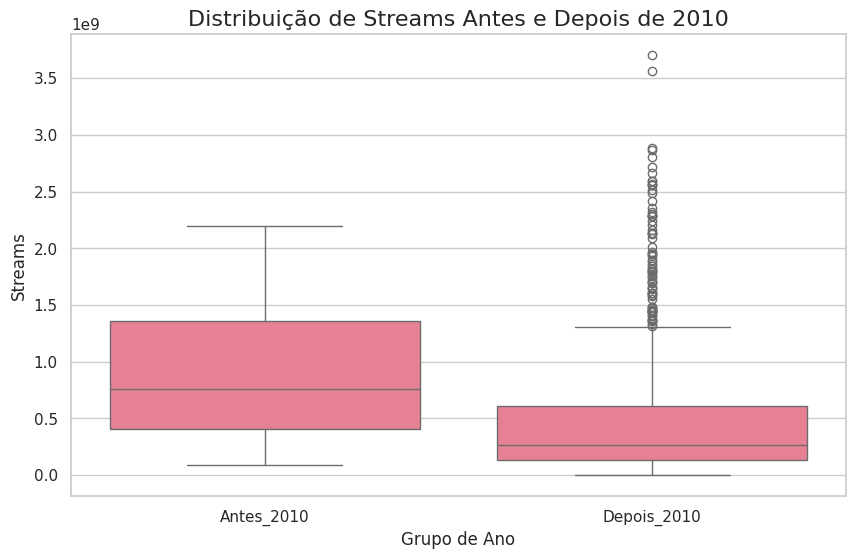

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Tratamento dos dados para a coluna de streams
df['streams'] = df['streams'].astype(str).str.replace(',', '', regex=False).astype(float)
df.dropna(subset=['streams'], inplace=True)
df['streams'] = df['streams'].astype(int)

# Converter a coluna released_year para o tipo numérico
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce').astype('Int64')

# Remover as linhas com valores ausentes na coluna 'released_year'
df.dropna(subset=['released_year'], inplace=True)

# Criar a coluna de grupo para a comparação
df['grupo_ano'] = np.where(df['released_year'] < 2010, 'Antes_2010', 'Depois_2010')

# Criar o gráfico de box plot para comparar a distribuição de 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo_ano', y='streams', data=df)

# Configurar o título e os rótulos
plt.title('Distribuição de Streams Antes e Depois de 2010', fontsize=16)
plt.xlabel('Grupo de Ano', fontsize=12)
plt.ylabel('Streams', fontsize=12)


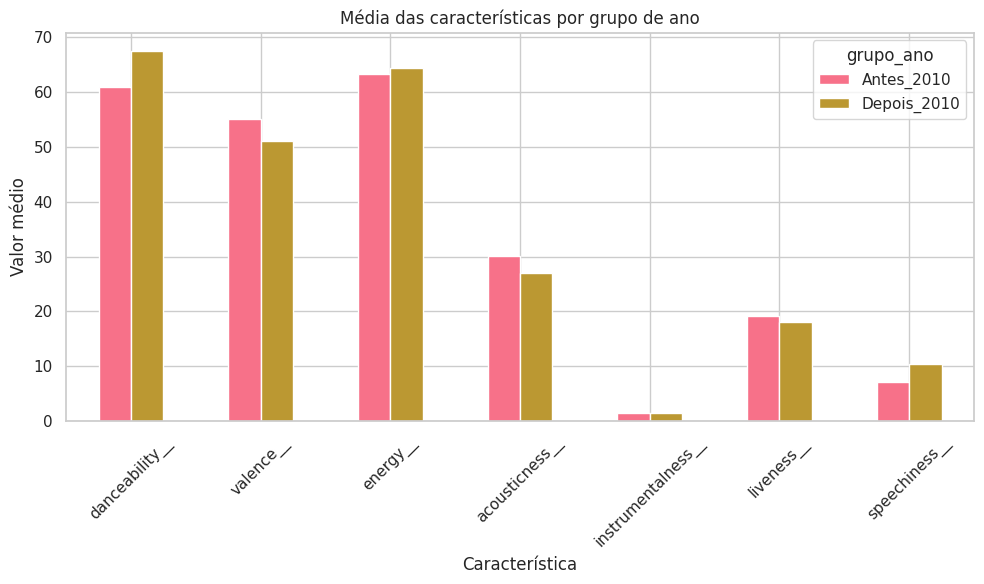

In [ ]:
df.groupby('grupo_ano')[caracteristicas].mean().T.plot(kind='bar', figsize=(10,6))
plt.title('Média das características por grupo de ano')
plt.ylabel('Valor médio')
plt.xlabel('Característica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install plotly pandas

In [ ]:
# Para manipulação de dados
import pandas as pd

# Para visualização (scorecard)
import plotly.graph_objects as go


# Indicadores gerais (exemplos)
total_musicas = df.shape[0]
media_streams = df['streams'].mean()
media_danceability = df['danceability__'].mean()
musicas_antes_2010 = df[df['grupo_ano'] == 'Antes_2010'].shape[0]
musicas_depois_2010 = df[df['grupo_ano'] == 'Depois_2010'].shape[0]

# Scorecard com Plotly
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=total_musicas,
    title={"text": "Total de Músicas"},
    domain={'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_streams,
    number={'prefix': "", "valueformat": ",.0f"},
    title={"text": "Média de Streams"},
    domain={'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode="number",
    value=media_danceability,
    number={'suffix': "%"},
    title={"text": "Média de Danceability"},
    domain={'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_antes_2010,
    title={"text": "Músicas < 2010"},
    domain={'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode="number",
    value=musicas_depois_2010,
    title={"text": "Músicas ≥ 2010"},
    domain={'row': 1, 'column': 1}))

fig.update_layout(
    grid={'rows': 2, 'columns': 3, 'pattern': "independent"},
    height=500,
    title="Scorecard da Base de Dados Musical"
)

fig.show()